In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
FILE_PATH = "/content/drive/MyDrive/한국경제_TossBank/중간_프로젝트/data/for_seunghoon.csv"

In [ ]:
import pandas as pd

# CSV 파일을 DataFrame으로 불러오기
ui_df = pd.read_csv(FILE_PATH)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링할 컬럼 목록
columns_to_scale = [
    '이용금액_업종기준', '이용금액_쇼핑', '이용금액_요식', '이용금액_교통',
    '이용금액_의료', '이용금액_납부', '이용금액_교육', '이용금액_여유생활',
    '이용금액_사교활동', '이용금액_일상생활', '이용금액_해외',
    '_1순위업종_이용금액', '_2순위업종_이용금액', '_3순위업종_이용금액',
    '_1순위쇼핑업종_이용금액', '_2순위쇼핑업종_이용금액',
    '_1순위교통업종_이용금액',
    '_1순위납부업종_이용금액',
    '이용금액_온라인_R6M', '이용금액_오프라인_R6M', '이용금액_온라인_R3M',
    '이용금액_오프라인_R3M', '이용금액_페이_온라인_R6M', '이용금액_페이_오프라인_R6M',
    '이용금액_페이_온라인_R3M', '이용금액_페이_오프라인_R3M',
    '이용금액_간편결제_R6M', '이용금액_A페이_R6M', '이용금액_B페이_R6M',
    '이용금액_C페이_R6M', '이용금액_D페이_R6M', '이용금액_간편결제_R3M',
    '이용금액_A페이_R3M', '이용금액_B페이_R3M', '이용금액_C페이_R3M',
    '이용금액_D페이_R3M', 'RP금액_B0M', '이용가맹점수'
]

# 스케일링할 데이터만 추출하여 새로운 DataFrame 생성
continuous_df = ui_df[columns_to_scale]

# StandardScaler를 사용하여 데이터 스케일링
scaler = StandardScaler()
scaled_continuous_df = pd.DataFrame(
    scaler.fit_transform(continuous_df),
    columns=continuous_df.columns
)

# 모든 행과 열을 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 스케일링된 데이터 확인
print(scaled_continuous_df.head())

   이용금액_업종기준   이용금액_쇼핑   이용금액_요식   이용금액_교통   이용금액_의료   이용금액_납부   이용금액_교육  \
0  -0.574196 -0.488951 -0.540888 -0.655274 -0.168525  0.343878 -0.266121   
1  -0.192558 -0.412740 -0.540888  0.298656  0.069481  0.428273 -0.266121   
2  -0.666070 -0.557836 -0.540888 -0.870898 -0.419849 -0.707426 -0.266121   
3  -0.790728 -0.632087 -0.540888 -0.523946 -0.419849 -0.707426 -0.266121   
4  -0.811491 -0.632087 -0.540888 -0.870898 -0.419849 -0.694779 -0.266121   

   이용금액_여유생활  이용금액_사교활동  이용금액_일상생활  이용금액_해외  _1순위업종_이용금액  _2순위업종_이용금액  \
0  -0.494377  -0.451661   1.238825 -0.36678    -0.530029    -0.388430   
1  -0.494377  -0.135708  -0.608198 -0.36678    -0.506316    -0.174451   
2  -0.494377  -0.440243  -0.608198 -0.36678    -0.653772    -0.610589   
3  -0.494377  -0.673828  -0.608198 -0.36678    -0.678374    -0.834822   
4  -0.494377  -0.673828  -0.608198 -0.36678    -0.726834    -0.834822   

   _3순위업종_이용금액  _1순위쇼핑업종_이용금액  _2순위쇼핑업종_이용금액  _1순위교통업종_이용금액  _1순위납부업종_이용금액  \
0    -0.460106      -0.470

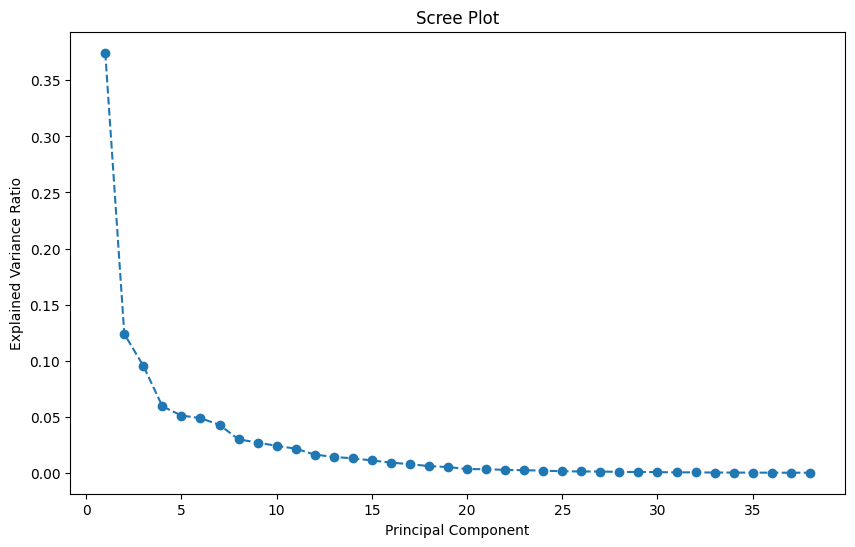

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA()
pca.fit(scaled_continuous_df)

# 스크리 플롯 생성
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    marker='o',
    linestyle='--'
)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [17]:
# 주성분의 수를 결정 (예: 3개로 축소)
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(scaled_continuous_df)

# 3개의 주성분에 맞는 열 이름 생성
columns = [f'PC{i+1}' for i in range(3)]

# PCA 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(pca_transformed, columns=columns)

# 변환된 DataFrame 확인
print(pca_df.head())

        PC1       PC2       PC3
0 -2.175366  0.026505 -0.047882
1 -1.223733 -0.727590 -0.314647
2 -3.046673  0.602743  0.156281
3 -3.143733  0.658628  0.152304
4 -3.346525  0.778613  0.179273


In [ ]:
# pca_df를 CSV로 저장
pca_df.to_csv('tlakdlwpqkf.csv', index=False)

# 파일 다운로드
from google.colab import files
files.download('tlakdlwpqkf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

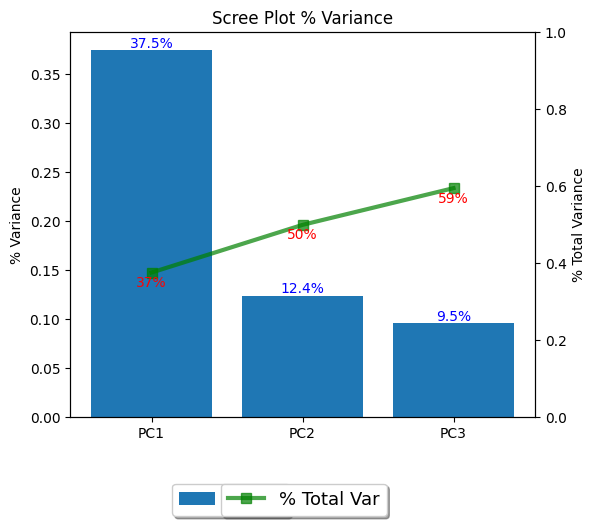

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import accumulate

# Assume pca is already defined and fitted
# If pca_df is the result of PCA transformation, you can use the corresponding PCA object (pca)
pca_size = len(pca.explained_variance_ratio_)
eigen_order = range(0, pca_size, 1)
eigen_label = ["PC" + str(i + 1) for i in range(pca_size)]

ratio = pca.explained_variance_ratio_
ratio_cumsum = np.array(list(accumulate(ratio)))

fig, ax1 = plt.subplots(figsize=(6, 5))

# Bar plot for individual explained variance
ax1.bar(eigen_label, ratio, label='% Var')

# Annotate each bar with the explained variance percentage
for i in range(pca_size):
    ax1.annotate(f"{ratio[i] * 100:.1f}%", (eigen_label[i], ratio[i]),
                 va='bottom', ha='center', fontsize=10, color='blue')

ax1.set_title('Scree Plot % Variance')
ax1.set_ylabel('% Variance')

ax2 = ax1.twinx()
ax2.set_ylim(0, 1)
ax2.plot(eigen_label, ratio_cumsum, '-s', color='green', markersize=7, linewidth=3, alpha=0.7, label='% Total Var')
ax2.set_ylabel('% Total Variance')

# Annotate cumulative variance percentages
for x, y in zip(eigen_label, ratio_cumsum):
    label = f"{y * 100:.0f}%"
    ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, -10), ha='center', color='red')

# Legend configuration
ax1.legend(loc='upper left', bbox_to_anchor=(0.2, -0.15), fancybox=True, shadow=True, ncol=5)
ax2.legend(loc='upper right', bbox_to_anchor=(0.7, -0.15), fancybox=True, shadow=True, ncol=5)

plt.rc('legend', fontsize=13)
plt.show()

In [20]:
!pip install beautifultable

In [21]:
from beautifultable import BeautifulTable

# 각 주성분이 원래 피처들에서 받은 가중치(loading) 확인
pca_loadings = pd.DataFrame(pca.components_.T, columns=columns, index=scaled_continuous_df.columns)

# BeautifulTable로 보기 좋게 출력하기
table = BeautifulTable()
table.column_headers = ["Feature"] + columns

# 데이터를 행으로 추가
for feature, row in pca_loadings.iterrows():
    table.append_row([feature] + list(row))

# 정렬: Feature 이름으로 정렬
table.sort("Feature")

# 보기 좋게 출력
print(table)

+----------------------------+-------+--------+--------+
|          Feature           |  PC1  |  PC2   |  PC3   |
+----------------------------+-------+--------+--------+
|         RP금액_B0M         | 0.073 | -0.034 | -0.023 |
+----------------------------+-------+--------+--------+
|  _1순위교통업종_이용금액   | 0.161 | -0.175 | -0.097 |
+----------------------------+-------+--------+--------+
|  _1순위납부업종_이용금액   | 0.101 | -0.053 | -0.037 |
+----------------------------+-------+--------+--------+
|  _1순위쇼핑업종_이용금액   | 0.196 | 0.174  | 0.234  |
+----------------------------+-------+--------+--------+
|    _1순위업종_이용금액     | 0.229 | 0.004  | 0.112  |
+----------------------------+-------+--------+--------+
|  _2순위쇼핑업종_이용금액   | 0.216 | -0.133 | 0.005  |
+----------------------------+-------+--------+--------+
|    _2순위업종_이용금액     | 0.223 | -0.162 | -0.054 |
+----------------------------+-------+--------+--------+
|    _3순위업종_이용금액     | 0.22  | -0.184 | -0.067 |
+----------------------------+-------+--